# Generalize Linear Model

这个章节的内容主要分成三部分

 1. Generalize Linear Model
 2. Linear Regression Model
 3. Logistic Regression Model

本章将按 2、3、1 的顺序来讲解，目的很简单，便于理解。

## Linear Regression Model

Linear Regression Model 就是为了找到数据的 Feature 和对应 Label 之间的线性关系，这里的线性关系可以是 Generalize 上的线性关系，Generalize 就是说模型的输入可以是直接是数据的 Feature，也可以是 Feature 经过函数变换后的结果。“ Regression ”的意思是说建立的模型输出不是一个类别变量，而是一个连续的、与原始的 Label 尽可能接近的实数。

最简单的 Linear Regression Model 是 Linear Regression with One Variable，也即 Feature 的数量是 1。可以通过 Numpy 很容易构造出这样的只有一个 Feature 和一个 Label 的数据集。

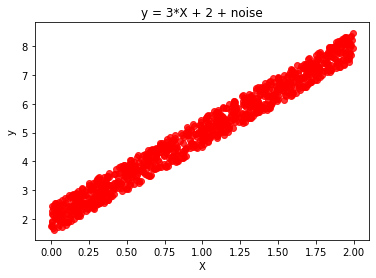

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x * 3 + 2

noise = np.random.uniform(-0.5, 0.5, 1000)
X = np.random.uniform(0, 2, 1000)
y = f(X) + noise

plt.scatter(X, y, alpha=0.8, c='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('y = 3*X + 2 + noise')
plt.show()
plt.close()

执行上面的代码，可以生成这部分内容所需要的数据集。函数 $f(x)$ 定一个了线性关系，即 $Label = 3 \times Feature + 2 + noise$，noise 表示的是一个从 [-0.5, 0.5) 正态分布中产生的随机数。添加 noise 的想法很直接，因为在实际的生活中，采集数据是会有误差的。

在这样的数据集上应用的 Linear Regression Model 方法，设定用于拟合数据集的函数为 $\hat{y}=\theta \cdot x + b$，在这个函数中，如果求解出 $\theta$ 和 $b$，任务就完成了。如何求解呢，可以这样想，一开始随机设置一个 $\theta$ 和 $b$，然后对比 $y$ 和 $\hat{y}$ 的差别，然后修改 $\theta$ 和 $b$ 使得新的 $y$ 和 $\hat{y}$ 的差距越来越小。上面这句话描述了 Machine Learning 中很重要的两个概念 Loss 和 Learning Method。在当前的情况下，Loss 可以选择 Mean Squared Error，用数学公式表示即为 $Loss(y, \hat{y}) = \frac{1}{2} (y - \hat{y})^2=\frac{1}{2} (y - \theta \cdot x - b)^2$。

## Stochastic Graident Descent

Learning Method 的目的是使得 Loss 的值越来越小，即要找到 Loss 的一个极小（极大）值。由于上面的 Loss 函数是关于 $\theta$ 和 $b$ 的二次函数，其他的 $y$ 和 $x$ 都是已知值，也即训练数据。所以 Loss 函数可以表示为 $Loss(\theta, b)$，要使得 Loss 变小，可以让 $\theta_{new} = \theta_{old} - \frac{\partial Loss}{\partial \theta}$，同理 $b$ 的变化方式也一样，知道 Loss 为 0 或者小于一个指定的值，就可以认为找到了理想的 $\theta$ 和 $b$。

$\begin{align*}
\theta & = \theta + \eta \cdot (y - \hat{y}) \cdot x\\
b & = b + \eta \cdot (y - \hat{y})
\end{align*}$

这种一次只取一个数据，然后更新 $\theta$ 和 $b$ 的做法叫做 Stochastic Graident Descent。好处就是实现起来比较简单，缺点呢就是收敛比较慢。

In [3]:
theta = 0.001
b = 0.001
LEARNING_RATE = 1e-5

EPOCH = 100000
PRINT_STEP = EPOCH / 20
for epoch in range(EPOCH):
    index = np.random.randint(0, X.shape[0], size=1)
    sample_x = X[index]
    sample_y = y[index]

    y_pred = theta * sample_x + b
    
    loss = y_pred - sample_y
    theta = theta - LEARNING_RATE * loss * sample_x
    b = b - LEARNING_RATE * loss

    if epoch % PRINT_STEP == 0:
        print('EPOCH: %d, loss: %f' % (epoch, np.sum(loss, 0)))

print('theta is %f, b is %f' % (theta, b))

EPOCH: 0, loss: -4.567968
EPOCH: 5000, loss: -5.287646
EPOCH: 10000, loss: -3.527037
EPOCH: 15000, loss: -1.384442
EPOCH: 20000, loss: -4.499792
EPOCH: 25000, loss: -2.632525
EPOCH: 30000, loss: -1.831436
EPOCH: 35000, loss: -1.016815
EPOCH: 40000, loss: -0.891495
EPOCH: 45000, loss: -2.467181
EPOCH: 50000, loss: -1.607668
EPOCH: 55000, loss: -1.367902
EPOCH: 60000, loss: -2.518616
EPOCH: 65000, loss: -0.799000
EPOCH: 70000, loss: -0.601373
EPOCH: 75000, loss: -0.281975
EPOCH: 80000, loss: -0.658904
EPOCH: 85000, loss: 0.054472
EPOCH: 90000, loss: -0.464901
EPOCH: 95000, loss: -0.251133
theta is 2.464697, b is 2.010429


# Batch Gradient Descent

Batch Gradient Descent 和 Stochastic Gradient Descent 的差别在于一次读取一批数据，然后使用这批数据的均值 Gradient，作为下降的参数，这个时候的 Stochastic Gradient Descent 就需要稍作修改，也即

$\begin{align*}
\theta & = \theta - \eta \cdot \frac{1}{N} \sum_i(\hat{y_i} - y_i) \cdot x_i \\
b & = b - \eta \cdot \frac{1}{N} \sum_i(\hat{y_i} - y_i)
\end{align*}$

一个批次的数据是 N，均值 Gradient 的计算即为 $\frac{1}{N} \sum_i(y_i - \hat{y_i}) \cdot x_i$

In [108]:
theta = 0.001
b = 0.001
LEARNING_RATE = 1e-5

BATCH_SIZE = 16
EPOCH = 100000
PRINT_STEP = EPOCH / 20
for epoch in range(EPOCH):
    index = np.random.randint(0, X.shape[0], size=BATCH_SIZE)
    sample_x = X[index]
    sample_y = y[index]

    y_pred = theta * sample_x + b
    
    loss = y_pred - sample_y
    theta = theta - LEARNING_RATE * np.dot(loss, sample_x) / BATCH_SIZE
    b = b - LEARNING_RATE * np.sum(loss, 0) / BATCH_SIZE

    if epoch % PRINT_STEP == 0:
        print('EPOCH: %d, loss: %f' % (epoch, np.sum(loss, 0)))

print('theta is %f, b is %f' % (theta, b))

EPOCH: 0, loss: -72.706199
EPOCH: 5000, loss: -72.682726
EPOCH: 10000, loss: -61.498566
EPOCH: 15000, loss: -66.433810
EPOCH: 20000, loss: -57.036746
EPOCH: 25000, loss: -47.145390
EPOCH: 30000, loss: -39.717586
EPOCH: 35000, loss: -34.368244
EPOCH: 40000, loss: -34.043655
EPOCH: 45000, loss: -23.964607
EPOCH: 50000, loss: -29.601389
EPOCH: 55000, loss: -20.299312
EPOCH: 60000, loss: -19.121107
EPOCH: 65000, loss: -16.300165
EPOCH: 70000, loss: -17.068002
EPOCH: 75000, loss: -17.943778
EPOCH: 80000, loss: -15.346634
EPOCH: 85000, loss: -13.281409
EPOCH: 90000, loss: -9.166695
EPOCH: 95000, loss: -9.519520
theta is 2.468228, b is 2.007035


## 使用 Tensorflow 或者 PyTorch 实现

### PyTorch

类似于 numpy 的 torch，没有使用 AutoGrad

In [111]:
import numpy as np
import torch

device = torch.device('cpu')
dtype = torch.double

INPUT_DIMENSION, OUTPUT_DIMENSION = 1, 1

theta = torch.randn(INPUT_DIMENSION, OUTPUT_DIMENSION, device=device, dtype=dtype)
b = torch.randn(1, 1, device=device, dtype=dtype)
LEARNING_RATE = 1e-5

BATCH_SIZE = 16
EPOCH = 100000
PRINT_STEP = EPOCH / 20

for epoch in range(EPOCH):
    index = np.random.randint(0, X.shape[0], size=BATCH_SIZE)
    sample_x = torch.from_numpy(X[index]).reshape(INPUT_DIMENSION, BATCH_SIZE)
    sample_y = torch.from_numpy(y[index])

    y_pred = theta.T * sample_x + b
    loss = y_pred - sample_y

    theta -= LEARNING_RATE * (loss.mul(sample_x).sum()) / BATCH_SIZE
    b -= LEARNING_RATE * loss.sum() / BATCH_SIZE

    if epoch % PRINT_STEP == 0:
        print('EPOCH: %d, loss: %f' % (epoch, loss.sum()))

print('theta is %f, b is %f' % (theta, b))

EPOCH: 0, loss: -102.904412
EPOCH: 5000, loss: -83.320822
EPOCH: 10000, loss: -81.446394
EPOCH: 15000, loss: -76.008217
EPOCH: 20000, loss: -60.860116
EPOCH: 25000, loss: -60.696865
EPOCH: 30000, loss: -50.003353
EPOCH: 35000, loss: -47.058425
EPOCH: 40000, loss: -43.526938
EPOCH: 45000, loss: -37.475776
EPOCH: 50000, loss: -33.970329
EPOCH: 55000, loss: -33.638986
EPOCH: 60000, loss: -26.596734
EPOCH: 65000, loss: -27.038399
EPOCH: 70000, loss: -25.734120
EPOCH: 75000, loss: -22.010929
EPOCH: 80000, loss: -16.874776
EPOCH: 85000, loss: -18.839582
EPOCH: 90000, loss: -17.596706
EPOCH: 95000, loss: -13.096202
theta is 3.348093, b is 0.829017


如果使用 AutoGrad，上面的代码就会少掉一部分。在 torch 中，每一个 epoch 要把每一个变量的 grad 设为 0，不设为 0 的话，grad 会累计。

In [114]:
置零import numpy as np
import torch

device = torch.device('cpu')
dtype = torch.double

INPUT_DIMENSION, OUTPUT_DIMENSION = 1, 1

theta = torch.randn(INPUT_DIMENSION, OUTPUT_DIMENSION, device=device, dtype=dtype, requires_grad=True)
b = torch.randn(1, 1, device=device, dtype=dtype, requires_grad=True)
LEARNING_RATE = 1e-5

BATCH_SIZE = 16
EPOCH = 100000
PRINT_STEP = EPOCH / 20

for epoch in range(EPOCH):
    index = np.random.randint(0, X.shape[0], size=BATCH_SIZE)
    sample_x = torch.from_numpy(X[index]).reshape(INPUT_DIMENSION, BATCH_SIZE)
    sample_y = torch.from_numpy(y[index])

    y_pred = theta.T * sample_x + b
    loss = y_pred - sample_y

    loss.sum().pow(2).backward()

    with torch.no_grad():
        theta -= LEARNING_RATE * theta.grad
        b -= LEARNING_RATE * b.grad

        # Manually zero the gradients after updating weights
        theta.grad.zero_()
        b.grad.zero_()

    if epoch % PRINT_STEP == 0:
        print('EPOCH: %d, loss: %f' % (epoch, loss.sum()))

print('theta is %f, b is %f' % (theta, b))

EPOCH: 0, loss: -82.247190
EPOCH: 5000, loss: 0.180486
EPOCH: 10000, loss: 0.606619
EPOCH: 15000, loss: -0.487827
EPOCH: 20000, loss: 1.099439
EPOCH: 25000, loss: -1.325968
EPOCH: 30000, loss: -2.932162
EPOCH: 35000, loss: -1.077218
EPOCH: 40000, loss: -1.680483
EPOCH: 45000, loss: -0.152094
EPOCH: 50000, loss: -2.976765
EPOCH: 55000, loss: -0.970170
EPOCH: 60000, loss: -0.379335
EPOCH: 65000, loss: 1.139528
EPOCH: 70000, loss: 1.674314
EPOCH: 75000, loss: -0.194425
EPOCH: 80000, loss: -0.931380
EPOCH: 85000, loss: 1.515865
EPOCH: 90000, loss: 1.040168
EPOCH: 95000, loss: -0.320050
theta is 2.996921, b is 2.012955
